# Pair programming Beautiful Soup

Enunciado: Escribe una función llamada scrape_coches_ocasion que acepta una URL como argumento y devuelve un DataFrame de pandas con información sobre coches de ocasión encontrados en la página web especificada. La función realizará las siguientes tareas:

1. Realizará una solicitud HTTP GET a la url siguiente: https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2

2. Comprobará el código de estado de la respuesta. Si el código no es 200 (OK), imprimirá un mensaje de error y retornará None.

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

url_coches = 'https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2'

res_coches = requests.get(url_coches)
res_coches.status_code

200

<!DOCTYPE html>
<html><head><meta charset="utf-8" class="next-head"/><title class="next-head">Coches de segunda mano, ocasión y seminuevos | OcasionPlus</title><meta class="next-head" content="4000 coches de ocasión y segunda mano con descuentos de hasta 6000€, la mejor relación calidad-precio garantizada." name="description"/><meta class="next-head" content="noindex, follow, noarchive" name="robots"/><meta class="next-head" content="width=device-width, initial-scale=1.0" name="viewport"/><link class="next-head" href="/static/favicon/favicon.ico" rel="shortcut icon" type="image/x-icon"/><link class="next-head" href="/static/favicon/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/><link class="next-head" href="/static/favicon/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/><link class="next-head" href="/static/favicon/favicon-194x194.png" rel="icon" sizes="194x194" type="image/png"/><link class="next-head" href="/static/favicon/android-chrome-192x192.png" rel=
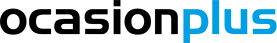

In [2]:
sopa_coches = BeautifulSoup(res_coches.content, 'html.parser')
sopa_coches

3. Extraerá los nombres de los coches, los precios rebajados, los precios originales y la información de los kilómetros recorridos de la página.

In [3]:
#nombres de los coches
lista_nombre_coches = sopa_coches.find_all('h2', {'style':"overflow-x:hidden"})
lista_nombre_coches
nombre_coches = []
for coche in lista_nombre_coches:
    nombre_coches.append(coche.text)
nombre_coches    

['Citroen C3 Aircross PureTech 82 Feel (82 CV)',
 'Toyota Auris 120T Active (116 CV)',
 'SEAT Leon 1.5 TSI S&S FR Edition Plus (150 CV)',
 'Peugeot Rifter PureTech Allure Standard (110 CV)',
 'Ssangyong Rexton D22DTR 4x2 Premium',
 'Volkswagen Polo Advance 1.0 (80 CV)',
 'Peugeot 2008 SUV PEUGEOT 2008 Allure Pack BlueHDI 81kW (110CV)',
 'SEAT Leon SEAT Leon 1.5 TGI GNC S&S FR 96 kW (130 CV)',
 'MINI MINI Countryman Cooper (136 CV)',
 'Opel Corsa 1.4 Expression (90 CV)',
 'Nissan Juke DIG-T N-Connecta 4x2 (117 CV)',
 'BMW X2 sDrive18d  (150 CV)',
 'SEAT Leon ST 1.2 TSI S&S Style (110 CV)',
 'Peugeot 2008 SUV BlueHDi 100 Allure (100 CV)',
 'Toyota C-HR 2.0 180H Advance (184 CV)',
 'Fiat 500C Sport Cabrio (69 CV)',
 'Ford Puma 1.0 EcoBoost (155CV) ST-Line X HEV Híbrido',
 'Hyundai i20 1.0 TGDI 48V Klass (100 CV)',
 'Renault Kangoo Combi Extrem M1-AF dCi(110 CV)',
 'Peugeot 208 1.2 PureTech Allure (82 CV)']

In [4]:
#los precios rebajados
lista_precio_r_coches = sopa_coches.find_all('span', {'class':"jsx-2689423372 price"})

precio_r_coches = []
for precio in lista_precio_r_coches:
    precio_r_coches.append(precio.text)
precio_r_coches

['10.990€',
 '13.536€',
 '17.727€',
 '20.354€',
 '26.273€',
 '12.900€',
 '21.272€',
 '16.182€',
 '19.990€',
 '7.727€',
 '16.272€',
 '24.818€',
 '10.900€',
 '8.000€',
 '22.636€',
 '8.954€',
 '19.772€',
 '18.264€',
 '13.545€',
 '9.991€']

In [5]:
# los precios originales {'class':"jsx-2689423372 price"}
lista_precio_o_coches = sopa_coches.find_all('span', {'class' : "jsx-2870186023 priceLast"})
lista_precio_o_coches
precio_o_coches = []
for precio in lista_precio_o_coches:
    precio_o_coches.append(precio.text)
precio_o_coches

['12.090€',
 '14.890€',
 '19.500€',
 '22.390€',
 '28.900€',
 '14.190€',
 '23.400€',
 '17.800€',
 '21.990€',
 '8.500€',
 '17.900€',
 '27.300€',
 '11.990€',
 '8.800€',
 '24.900€',
 '9.850€',
 '21.750€',
 '20.090€',
 '14.900€',
 '10.990€']

In [6]:
#información de los kilómetros
lista_km_coches = sopa_coches.find_all('span', {'class' : "jsx-3960002075 detail big"})
km_coches = []
for km in lista_km_coches:    
    km_coches.append(km.text)
km_coches

['05/2018',
 '75.477 km',
 'Gasolina',
 'Manual',
 '07/2017',
 '44.519 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 '10/2019',
 '22.060 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 'Único propietario',
 '06/2019',
 '70.803 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 'Único propietario',
 '02/2019',
 '101.168 km',
 'Diésel',
 'Manual',
 '05/2019',
 '23.779 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 '05/2021',
 '29.257 km',
 'Diésel',
 'Manual',
 '11/2019',
 '75.425 km',
 'GNC',
 'Manual',
 'Libro Mantenimiento',
 'Único propietario',
 'Garantía oficial: Diciembre 2023',
 '11/2019',
 '28.120 km',
 'Gasolina',
 'Manual',
 '07/2016',
 '78.873 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 '09/2020',
 '84.572 km',
 'Gasolina',
 'Manual',
 'Único propietario',
 '01/2020',
 '54.158 km',
 'Diésel',
 'Manual',
 'Libro Mantenimiento',
 '06/2017',
 '145.772 km',
 'Gasolina',
 'Manual',
 'Libro Mantenimiento',
 '12/2015',
 '169.229 km',
 'Diésel',
 'Ma

In [7]:
km_coches_ok = []
for km in km_coches:
    lista_km = re.findall('\d+\.\d+\skm', km)
    if len(lista_km) >= 1:
       km_coches_ok.append(km)

km_coches_ok      

['75.477 km',
 '44.519 km',
 '22.060 km',
 '70.803 km',
 '101.168 km',
 '23.779 km',
 '29.257 km',
 '75.425 km',
 '28.120 km',
 '78.873 km',
 '84.572 km',
 '54.158 km',
 '145.772 km',
 '169.229 km',
 '31.442 km',
 '88.922 km',
 '31.842 km',
 '17.108 km',
 '123.362 km',
 '55.786 km']

In [6]:
print('nombres', len(lista_nombre_coches))
print('precio r', len(lista_precio_r_coches))
print('precio o', len(lista_precio_o_coches))
print('km', len(km_coches_ok))


nombres 20
precio r 20
precio o 18
km 20


In [9]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

def scrape_coches_ocasion(url):

    res_coches = requests.get(url)
    print(f"Respuesta: {res_coches.status_code}")
    if res_coches.status_code == 200:
        print("OK")
    else:
        print(f"Error: {res_coches.reason}")
        return None    

    sopa_coches = BeautifulSoup(res_coches.content, 'html.parser')

    #nombres de los coches
    lista_nombre_coches = sopa_coches.find_all('h2', {'style':"overflow-x:hidden"})
    nombre_coches = []
    for coche in lista_nombre_coches:
        nombre_coches.append(coche.text)

    #los precios rebajados
    lista_precio_r_coches = sopa_coches.find_all('span', {'class':"jsx-2689423372 price"})

    precio_r_coches = []
    for precio in lista_precio_r_coches:
        precio_r_coches.append(precio.text)

    # los precios originales {'class':"jsx-2689423372 price"}
    lista_precio_o_coches = sopa_coches.find_all('span', {'class' : "jsx-2870186023 priceLast"})

    precio_o_coches = []
    for precio in lista_precio_o_coches:
        precio_o_coches.append(precio.text)

    #información de los kilómetros
    lista_km_coches = sopa_coches.find_all('span', {'class' : "jsx-3960002075 detail big"})
    km_coches = []
    for km in lista_km_coches:    
        km_coches.append(km.text)

    km_coches_ok = []
    for km in km_coches:
        lista_km = re.findall('\d+\.\d+\skm', km)
        if len(lista_km) >= 1:
            km_coches_ok.append(km)


    lista_elementos = [nombre_coches, precio_r_coches, precio_o_coches, km_coches_ok]

    for indice, valor in enumerate(nombre_coches):
        diccionario["nombre"] = nombre_coches[indice]  
        diccionario["precio rebajado"] = precio_r_coches[indice]  
        diccionario["precio original"] = precio_o_coches[indice]  
        diccionario["km"] = km_coches_ok[indice]  

    df = pd.DataFrame(diccionario)
    
    return df   

4. Organizará los datos extraídos en un DataFrame de pandas con las siguientes columnas:
- "coche": Nombres de los coches.
- "precio_rebajado": Precios rebajados.
- "precio_original": Precios originales.
- "km": Kilómetros recorridos.

5. Retornará el DataFrame resultante.

6. Una vez extraida toda la información deberéis almacenar toda la información en un DataFrame. El DataFrame debe tener un aspecto parecido a este:
Coche
Precio Rebajado
Precio Original
Kilómetros
Toyota Corolla 140H Active Plus Auto (140 CV)
25.273€
27.800€
2.839 km
Ford Focus 1.0 Ecoboost S&S Titanium Auto (125...
17.354€
19.090€
37.479 km
Hyundai Santa Fe 2.0 CRDI Essence 4x2 7 Plazas...
21.363€
23.500€
51.690 km
Audi A3 Sportback Sportback 1.6 TDI (116 CV)
17.727€
19.500€
66.918 km
Hyundai Tucson 1.6 TGDI (177CV) Tecno Sky Safe...
23.954€
26.350€
32.183 km
Jeep Renegade 1.0G 80 Aniversario 4x2 (120 CV)
18.636€
20.500€
60.279 km
Renault Captur Zen Energy TCe (120 CV)
14.727€
16.200€
25.316 km
Audi A1 Sportback 25 TFSI (95 CV)
14.363€
15.800€
65.520 km
Citroen C4 Cactus PureTech 110 S&S
15.082€
16.590€
35.116 km
Shine Pack ...
Kia Sportage GDi Drive 4x2 (132 CV)
17.682€
20.250€
82.460 km
Dacia Sandero Serie Limitada Xplore TCe (90 CV)
12.718€
13.990€
82.414 km
SEAT Ateca 1.4 EcoTSI S&S Xcellence (150 CV)
21.363€
23.500€
40.859 km
Peugeot 208 PEUGEOT 208 PureTech 73kW (100CV) GT
17.818€
19.600€
22.180 km
Mercedes-Benz Clase CLA CLA 200 (163 CV) PACK AMG
30.681€
33.750€
61.658 km
Peugeot 208 PureTech 100 GT (100 CV)
17.772€
19.550€
23.631 km
Opel Astra 1.5 D GS Line (122 CV)
14.045€
15.450€
71.934 km
SEAT Leon 2.0 TDI S&S Style (115 CV)
20.081€
22.090€
29.035 km
Peugeot 208 PureTech 100 GT (100 CV)
17.681€
19.450€
30.896 km
Opel Mokka X OPEL Mokka X 1.4 T 103kW 4X2 Inno...
14.727€
16.200€
114.422 km
Citroen Berlingo Talla M PureTech 110 S&S SHINE
20.818€
22.900€
49.615 km

In [11]:
url_coches = 'https://www.ocasionplus.com/coches-ocasion?type%3DCAR%26sort%3DFECHAOP_DESC%26page%3D2'

tabla_coches = scrape_coches_ocasion(url_coches)

tabla_coches    

Respuesta: 200
OK


IndexError: list index out of range